# 0. 설정

In [ ]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

- 캘리포니아 부동산 업자에게 의뢰를 받았다고 가정
- 결과 데이터 존재하기에 지도학습 모델 사용
- 결과 데이터는 집값 수치형 데이터이기에 회귀 모델 사용

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
# 파일은 코랩 환경에서 다운받아서 압축 해제


In [ ]:
# 압축 해제된 csv 파일을 판다스 데이터프레임 객체에 담기.
# housing = 

#2. 점검 및 탐색

## 데이터 탐색

In [ ]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,


- longitude: 경도 
- latitude: 위도
- housing_median_age: 주택이 지어진 기간(중앙값)
- total_bedrooms: 전체 방의 개수
- total_bedrooms: 전체 침실 개수
- population: 인구 수
- households: 세대 수
- median_income: 중간 소득
- median_house_value: 중간 주택 가격
- ocean_proximity: 바다 접근도

In [ ]:
# 데이터탐색 방법: head(), tail()


In [ ]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()


In [ ]:
# 데이터의 통계 자료 확인하기: describe()


In [ ]:
# 특정 칼럼의 데이터 카테고리별 값 세기: value_counts(), 범주형 데이터에 주로 사용


## 시각화

- seaborn 시각화 자료: https://seaborn.pydata.org/examples/index.html
- 예제 블로그: https://coding-kindergarten.tistory.com/133?category=1003348

In [ ]:
#히스토그램을 통한 데이터 확인
#data.hist(bins=30, figsize=(20,15))
#plt.show()

In [ ]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때: pairplot(data, corner = True)


피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
# 상관분석: .corr()

In [ ]:
#corr_matrix = housing.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)

**cmap 관련 예제**
- 참고 자료: https://wikidocs.net/141538

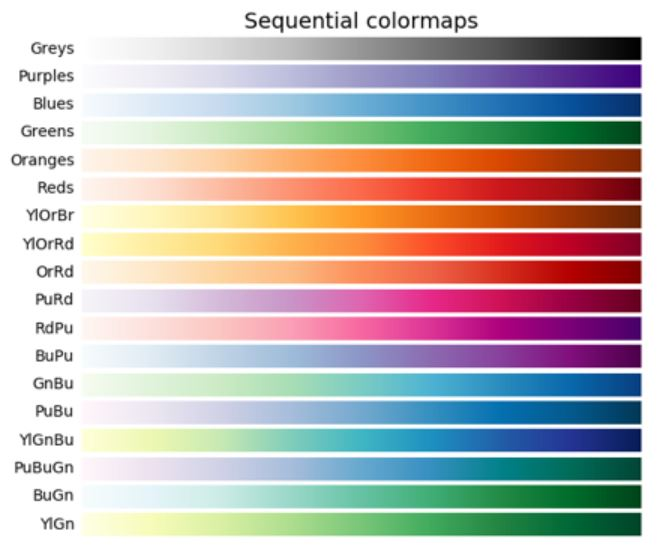

In [ ]:
# 상관분석의 시각화: .heatmap(data, annot = True, cmap='color')

In [ ]:
# 위도 경도를 통한 지도 위치 확인과 인구 밀집도 확인, 산점도 사용
#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#             s=housing["population"]/100, label="population", figsize=(10,7),
#             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
#             sharex=False)
#plt.legend()

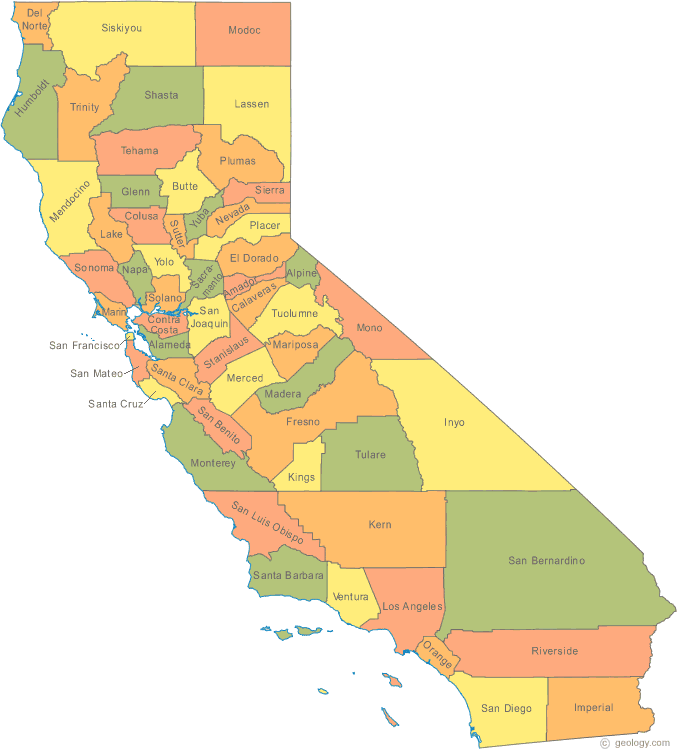

#3. 전처리 및 정제

In [ ]:
# 결측치 처리: sample = housing[housing.isnull().any(axis=1)].head()

In [ ]:
# 결측치 처리 옵션1: 데이터 탐색 결과 해당 칼럼은 필요 없을 것 같다.
# housing.dropna(subset=["total_bedrooms"])

In [ ]:
# 결측치 처리 옵션2: 데이터 탐색 결과 해당 칼럼은 반드시 필요하다.
# housing.drop("total_bedrooms", axis=1)

In [ ]:
# 결측치 처리 옵션3: 군집화를 이용한 카테고리 분류
# X

In [ ]:
# 결측치 처리 모듈
# ocean_proximity로 인해 에러 발생 => housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
# 이상값
# 상위 1%의 급여를 이상치로 처리해야할까? 회사 급여 관련 데이터를 다룰때 CEO의 급여는 포함되어야하는가?

In [ ]:
# 노이즈 데이터
# X

# 데이터 통합
# X

In [ ]:
# 범주형 데이터 - 문자열 처리: OrdinalEncoder
#from sklearn.preprocessing import OrdinalEncoder

# housing_cat = housing[["ocean_proximity"]]
# housing_cat.head(10)

In [ ]:
#ordinal_encoder = OrdinalEncoder()
#housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded[:10]

In [ ]:
# 인코딩된 카테고리의 원본 데이터 확인: categories_

In [ ]:
# 기존 데이터 칼럼 삭제 및 인코딩된 데이터 추가
# housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
#데이터 분리: 훈련셋, 검증셋
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

In [ ]:
# 훈련, 테스트 데이터셋를 분리한 후 X,Y 분리.
# housing = train_set.drop("median_house_value", axis=1) 
# housing_labels = train_set["median_house_value"].copy()

#4. 모델링 및 훈련

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
#forest_reg.fit(housing_prepared, housing_labels)

#5. 평가

In [ ]:
# MSE, RMSE
from sklearn.metrics import mean_squared_error

data_predictions = MLmodel.predict(X_test)
mse = mean_squared_error(y_test, data_predictions)
rmse = np.sqrt(mse)
rmse

##결과 시각화

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= data_predictions, y= y_test, color= '#005b96')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.show()

In [ ]:
plt.figure(figsize= (8, 6))
sns.residplot(x= data_predictions, y = y_test, color= '#005b96')
plt.show()

In [ ]:
resid = data_predictions - y_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');

#6. 배포

In [ ]:
#my_model = model or

import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF